In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gnd_data = pd.read_csv("../data/full_gnd_emolex.csv")

In [3]:
gnd_data.columns

Index(['id_str', 'created_at', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'screen_name', 'name', 'location', 'negative', 'positive',
       'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'],
      dtype='object')

In [4]:
emotions = ["positive", "joy", "trust", "surprise", "anticipation", "negative", "anger", "disgust", "fear", "sadness"]

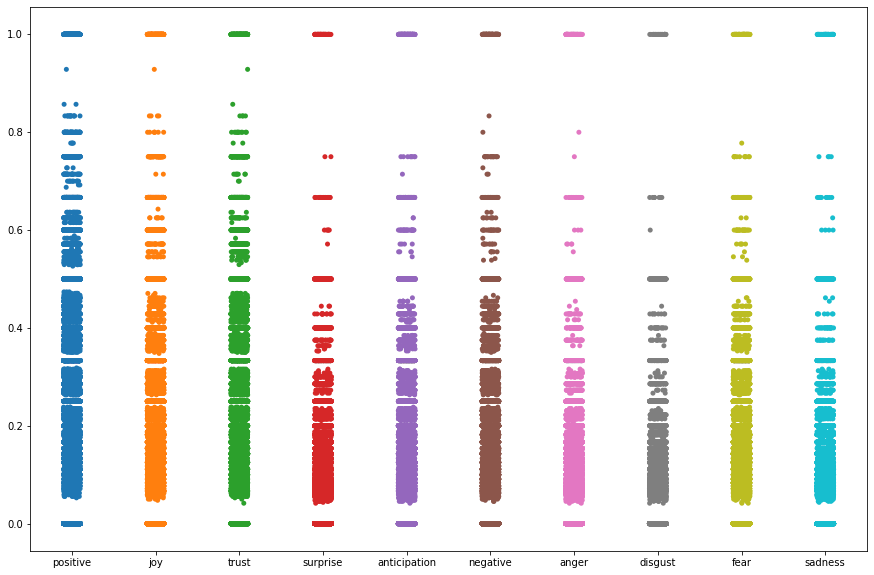

In [5]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_data[emotions])
plt.show()

In [24]:
gnd_topic_2_words = ["explain", "implement", "solution", "lead", "reduce"]
gnd_topic_2 = gnd_data[gnd_data["full_text"].str.contains("explain|implement|solution|lead|reduce", na=False)]

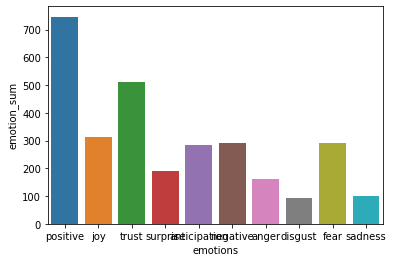

In [26]:
topic_2_emotions = gnd_topic_2[emotions].sum(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="emotion_sum")
ax = sns.barplot(x="emotions", y="emotion_sum", data=topic_2_emotions)

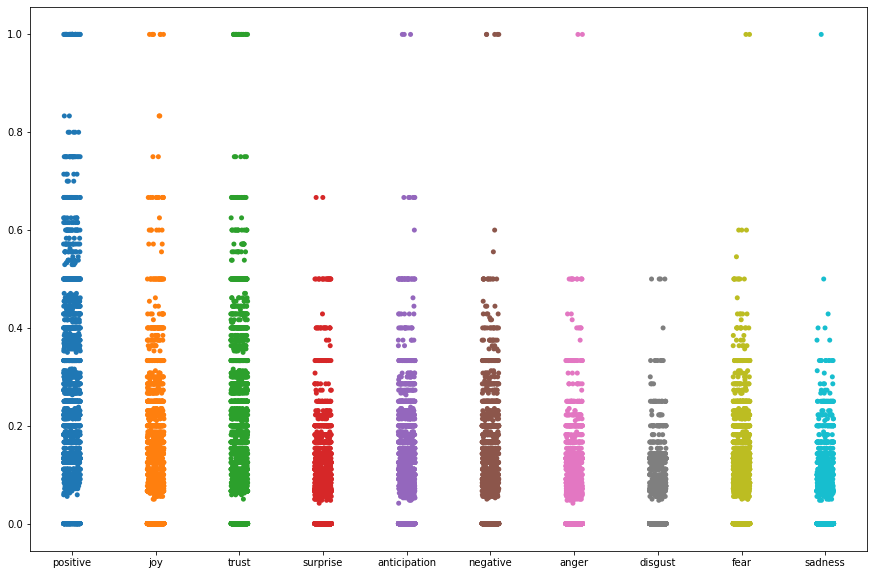

In [27]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_topic_2[emotions])
plt.show()

In [28]:
gnd_topic_3_words = ["panelsnotpipeline", "cdnpoli"]
gnd_topic_3 = gnd_data[gnd_data["full_text"].str.contains("panelsnotpipeline|cdnpoli", na=False)]

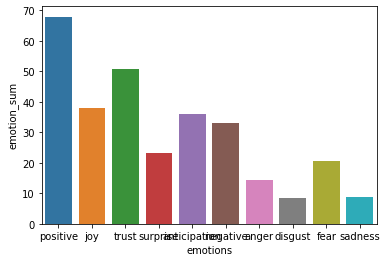

In [29]:
topic_3_emotions = gnd_topic_3[emotions].sum(axis = 0, skipna = True).rename_axis("emotions").reset_index(name="emotion_sum")
ax = sns.barplot(x="emotions", y="emotion_sum", data=topic_3_emotions)

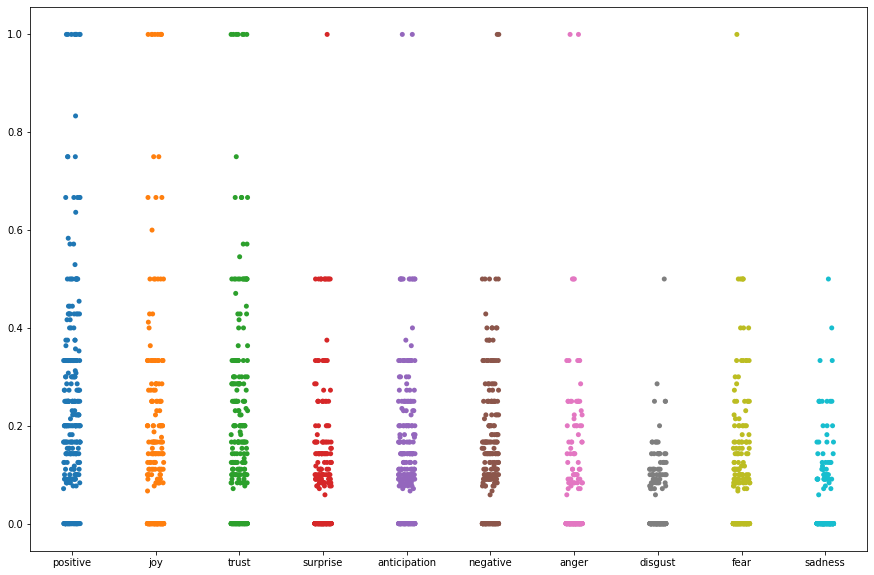

In [30]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_topic_3[emotions])
plt.show()

In [ ]:
def plot_trend(chart_title, sentiment_sdf, emotions, rolling_window=90):

    emotions = ["positive", "negative"]
    trend_pdf = sentiment_sdf[["created_at"] + emotions]
    trend_pdf = trend_pdf.sort_values(by = "created_at")
    
    fig, ax = plt.subplots(figsize=(25,10), sharex=True)
    fig.suptitle('{}'.format(chart_title))
    for emotion in emotions:
        rolling = trend_pdf[emotion].rolling(window=rolling_window).mean()
        ax.plot(trend_pdf.created_at, rolling, label=emotion)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
gnd_data["created_at"] = pd.to_datetime(gnd_data["created_at"])
plot_trend("gnd emotions", gnd_data, emotions)